<a href="https://colab.research.google.com/github/debernall/Proyecto/blob/main/Proyecto_bootcamp_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introducción

# Proyecto Lluvia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os

In [2]:
import plotly.express as pex
from plotly.subplots import make_subplots
import plotly.graph_objects as go

*Sistema de archivos*

    ./
    
    ./Proyecto/
        ./Proyecto/Proyecto_bootcamp_cuaderno.ipynb

    ./Datasets/
        ./Datasets/...... .csv
    
    ./CleanDatasets/
        ./CleanDatasets/.....  .parquet


# Limpieza de archivos precipitaciones - conversión a parquet

### Primera exploración

Se importa el primer documento previo a la limpieza. Se inicia con el archivo de menor tamaño. Todos los datos corresponden a precipitación y tienen la misma unidad de medida.

In [3]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 #nrows=10
                 )
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,42077020,240,11/01/2023 07:30:00 PM,0.2,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
1,42077020,240,11/01/2023 11:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
2,42077020,240,11/01/2023 03:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
3,42077020,240,11/01/2023 09:30:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
4,42077020,240,11/01/2023 05:40:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
9147,42077020,240,06/22/2024 02:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9148,42077020,240,06/22/2024 01:30:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9149,42077020,240,06/22/2024 01:40:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9150,42077020,240,06/22/2024 01:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm


En la siguiente celda se imprime un pequeño resumen. Es importante resaltar que no hay datos nulos y la necesidad de cambiar el formato de cada columna por uno mas adecuado que reduzca el tamaño del dataframe.

In [4]:
size_0=df.memory_usage(deep=True).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoEstacion     9152 non-null   int64  
 1   CodigoSensor       9152 non-null   int64  
 2   FechaObservacion   9152 non-null   object 
 3   ValorObservado     9152 non-null   float64
 4   NombreEstacion     9152 non-null   object 
 5   Departamento       9152 non-null   object 
 6   Municipio          9152 non-null   object 
 7   ZonaHidrografica   9152 non-null   object 
 8   Latitud            9152 non-null   float64
 9   Longitud           9152 non-null   float64
 10  DescripcionSensor  9152 non-null   object 
 11  UnidadMedida       9152 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 858.1+ KB


### Vaupes

Se importa nuevamente el archivo csv, seleccionando las columnas relevantes y eligiendo un formato adeacuado para cada columna.

In [5]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0042077020,0240,11/01/2023 07:30:00 PM,0.2,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
1,0042077020,0240,11/01/2023 11:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
2,0042077020,0240,11/01/2023 03:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
3,0042077020,0240,11/01/2023 09:30:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
4,0042077020,0240,11/01/2023 05:40:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
...,...,...,...,...,...,...,...,...,...,...
9147,0042077020,0240,06/22/2024 02:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9148,0042077020,0240,06/22/2024 01:30:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9149,0042077020,0240,06/22/2024 01:40:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9150,0042077020,0240,06/22/2024 01:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


Se muestra una comparación entre el tamaño del dataframe tras el cambio de formato a las columnas

In [7]:
size_f=df.memory_usage(deep=True).sum()
print(size_f/size_0)

0.1759772734217371


**Formato de fecha**

In [8]:
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    9152 non-null   category      
 1   CodigoSensor      9152 non-null   category      
 2   FechaObservacion  9152 non-null   datetime64[ns]
 3   ValorObservado    9152 non-null   float32       
 4   NombreEstacion    9152 non-null   category      
 5   Departamento      9152 non-null   category      
 6   Municipio         9152 non-null   category      
 7   ZonaHidrografica  9152 non-null   category      
 8   Latitud           9152 non-null   category      
 9   Longitud          9152 non-null   category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 178.9 KB


In [10]:
df.to_parquet('../CleanDatasets/rain_vaupes.parquet')

In [11]:
namesFiles = os.listdir('../Datasets')
namesFiles = [re.findall(r'\((\w*)\)',x)[0] for x in namesFiles]
print(namesFiles)

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']


### Caquetá

Tener en cuenta que la información sobre caquetá está almacenada en dos archivos

#### Caquetá 2

In [12]:
nameFile = '../Datasets/Precipitaci_n_20241016('+ namesFiles[13] +').csv'
nameFile

'../Datasets/Precipitaci_n_20241016(caqueta2).csv'

In [13]:
df_caqueta2 = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df_caqueta2['FechaObservacion'] = pd.to_datetime(df_caqueta2['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_caqueta2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0044055010,0240,2023-09-13 01:50:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
1,0044035501,0240,2023-09-18 06:30:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
2,0044035501,0240,2023-09-19 07:50:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
3,0044035501,0240,2023-09-19 07:30:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
4,0044035501,0240,2023-09-18 09:20:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
...,...,...,...,...,...,...,...,...,...,...
14541,0044055010,0240,2024-06-12 02:30:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14542,0044055010,0240,2024-06-12 06:30:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14543,0044055010,0240,2024-06-12 12:50:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14544,0044055010,0240,2024-06-12 02:10:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111


La siguiente celda imprimirá la cantidad de valores de nulos

In [14]:
nulls = df_caqueta2.count(axis=1).sum()
size = df_caqueta2.shape[0]*df_caqueta2.shape[1]
print(size-nulls)

0


De nuevo se observa que el archivo tiene un tamaño menor y que los diferentes formatos son aplicados correctamente a cada columna

In [15]:
df_caqueta2.info()
#df_caqueta2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    14546 non-null  category      
 1   CodigoSensor      14546 non-null  category      
 2   FechaObservacion  14546 non-null  datetime64[ns]
 3   ValorObservado    14546 non-null  float32       
 4   NombreEstacion    14546 non-null  category      
 5   Departamento      14546 non-null  category      
 6   Municipio         14546 non-null  category      
 7   ZonaHidrografica  14546 non-null  category      
 8   Latitud           14546 non-null  category      
 9   Longitud          14546 non-null  category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 285.1 KB


### Todos los departamentos

In [16]:
print(namesFiles)
print(len(namesFiles))

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']
46


In [24]:
for name in namesFiles[:]:
    nameFile = '../Datasets/Precipitaci_n_20241016('+ name +').csv'
    df_dept = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
    df_dept['FechaObservacion'] = pd.to_datetime(df_dept['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
    nulls = df_dept.count(axis=1).sum()
    size = df_dept.shape[0]*df_dept.shape[1]
    if nulls-size != 0:
        print(f'{nulls-size} nulls in {name}, parquet file can not created')
    else:
        df_dept.to_parquet(f'../CleanDatasets/rain_{name}.parquet')
        print(f'Not nulls in {name}, parquet file created')


Not nulls in amazonas, parquet file created
Not nulls in antioquia, parquet file created
Not nulls in arauca, parquet file created
Not nulls in atlantico1, parquet file created
Not nulls in atlantico2, parquet file created
Not nulls in bogota1, parquet file created
Not nulls in bogota2, parquet file created
Not nulls in bogota3, parquet file created
Not nulls in bolivar1, parquet file created
Not nulls in bolivar2, parquet file created
Not nulls in boyaca, parquet file created
Not nulls in caldas, parquet file created
Not nulls in caqueta1, parquet file created
Not nulls in caqueta2, parquet file created
Not nulls in casanare, parquet file created
Not nulls in cauca, parquet file created
Not nulls in cesar, parquet file created
Not nulls in choco, parquet file created
Not nulls in choco1, parquet file created
Not nulls in cordoba1, parquet file created
Not nulls in cordoba2, parquet file created
Not nulls in cundinamarca, parquet file created
Not nulls in guainia, parquet file created


# Consolidación de archivos

Se requiere un conjunto de datos que contiene la información de las estaciones de monitoreo.

A continuación se listan los archivos de la segunda carpeta que contiene los datasets:

    - Catálogo nacional de estaciones (Contine el listado de las estaciones)
    - Datos de estaciones IDEAM y terceros (Contiene mediciones de diversas estaciones propias y externas al IDEAM)
    - Datos hidrometeorológicos (Mediciones de temperatura)
    - Presión atmosférica  

In [25]:
namesFiles2 = os.listdir('../Datasets2')
namesFiles2 = [x for x in namesFiles2]
print(namesFiles2)

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv', 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv', 'Presi_n_Atmosf_rica_20241017.csv']


### Limpieza *DATOS ESTACIONES IDEAM*

La ruta de acceso al archivo de Datos estaciones IDEAM es f'../Datasets2/{namesFiles2[1]}'

In [26]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            nrows=3
)
df_estaciones

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Entidad
0,2120500204,69,10/15/2024 09:04:00 PM,15.8,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,2120500204,70,10/15/2024 09:59:00 PM,15.5,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,2120500204,69,10/15/2024 10:25:00 PM,15.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [27]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category',12:'category'}
                            #nrows=3
)
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CodigoEstacion     202642 non-null  category
 1   CodigoSensor       202642 non-null  category
 2   FechaObservacion   202642 non-null  object  
 3   ValorObservado     202642 non-null  float32 
 4   NombreEstacion     202642 non-null  category
 5   Departamento       202642 non-null  category
 6   Municipio          202642 non-null  category
 7   ZonaHidrografica   202642 non-null  category
 8   Latitud            202642 non-null  category
 9   Longitud           202642 non-null  category
 10  DescripcionSensor  202642 non-null  category
 11  UnidadMedida       202642 non-null  category
 12  Entidad            202642 non-null  category
dtypes: category(11), float32(1), object(1)
memory usage: 5.3+ MB


Se evidencia que no hay valores nulos. Hacemos una conversión a formato de fecha y almacenamos el archivo en formato .parquet

In [28]:
df_estaciones['FechaObservacion'] = pd.to_datetime(df_estaciones['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CodigoEstacion     202642 non-null  category      
 1   CodigoSensor       202642 non-null  category      
 2   FechaObservacion   202642 non-null  datetime64[ns]
 3   ValorObservado     202642 non-null  float32       
 4   NombreEstacion     202642 non-null  category      
 5   Departamento       202642 non-null  category      
 6   Municipio          202642 non-null  category      
 7   ZonaHidrografica   202642 non-null  category      
 8   Latitud            202642 non-null  category      
 9   Longitud           202642 non-null  category      
 10  DescripcionSensor  202642 non-null  category      
 11  UnidadMedida       202642 non-null  category      
 12  Entidad            202642 non-null  category      
dtypes: category(11), datetime64[ns](1), float32(

In [29]:
df_estaciones.to_parquet('../CleanDatasets2/estaciones.parquet')

### Limpieza *DATOS PRESIÓN ATMOSFÉRICA*

In [30]:
namesFiles2

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv',
 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv',
 'Presi_n_Atmosf_rica_20241017.csv']

La ruta de acceso a los datos de presión atmosférica es: f '../Datasets2/{namesFiles2[-1]}']

In [31]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        nrows=3
)
df_presion

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,36015020,255,10/03/2017 06:00:00 AM,992.5,EL DIAMANTE - AUT,CASANARE,PAZ DE ARIPORO,META,5.816194,-71.419833,Presión Atmosferica (1h),HPa
1,21195190,255,02/14/2014 05:00:00 AM,785.2,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111,-74.311750,Presión Atmosferica (1h),HPa
2,21015050,255,09/27/2013 06:00:00 PM,805.3,PURACE - AUT,HUILA,SAN AGUSTÍN,ALTO MAGDALENA,1.925917,-76.427556,Presión Atmosferica (1h),HPa


In [32]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_presion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22611008 entries, 0 to 22611007
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 582.3+ MB


In [33]:
df_presion['FechaObservacion'] = pd.to_datetime(df_presion['FechaObservacion'],format='%m/%d/%Y %H:%M:%S %p')
df_presion

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,0036015020,0255,2017-10-03 06:00:00,992.500000,EL DIAMANTE - AUT,CASANARE,PAZ DE ARIPORO,META,5.816194444,-71.41983333,Presión Atmosferica (1h),HPa
1,0021195190,0255,2014-02-14 05:00:00,785.200012,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111111,-74.31175,Presión Atmosferica (1h),HPa
2,0021015050,0255,2013-09-27 06:00:00,805.299988,PURACE - AUT,HUILA,SAN AGUSTÍN,ALTO MAGDALENA,1.925916667,-76.42755556,Presión Atmosferica (1h),HPa
3,0021115010,0255,2005-11-28 10:00:00,958.500000,DESIERTO TATACOA,HUILA,VILLAVIEJA,ALTO MAGDALENA,3.234,-75.168,Presión Atmosferica (1h),HPa
4,0028035060,0255,2008-04-08 04:00:00,988.700012,FEDEARROZ - AUT,CESAR,VALLEDUPAR,CESAR,10.46361111,-73.24805556,Presión Atmosferica (1h),HPa
...,...,...,...,...,...,...,...,...,...,...,...,...
22611003,0048015050,0258,2024-10-16 11:04:00,1000.500000,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861111,-69.94091667,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611004,0048015050,0258,2024-10-16 09:08:00,1004.099976,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861111,-69.94091667,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611005,0016015501,0258,2024-10-16 07:02:00,972.900024,AEROPUERTO CAMILO DAZA,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.93028,-72.50917,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611006,0048015040,0255,2024-10-16 10:40:00,997.400024,PUERTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780305556,-70.36263889,PRESIÓN ATMOSFÉRICA,hPa


In [34]:
df_presion.count()

CodigoEstacion       22611008
CodigoSensor         22611008
FechaObservacion     22611008
ValorObservado       22611008
NombreEstacion       22611008
Departamento         22611008
Municipio            22611008
ZonaHidrografica     22611008
Latitud              22611008
Longitud             22611008
DescripcionSensor    22611008
UnidadMedida         22611008
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [35]:
df_presion.to_parquet('../CleanDatasets2/presion.parquet')

### Limpieza *DATOS TEMPERATURA*

Los datos de temperatura se distribuyen en 5 archivos csv distintos, todos con las mismas columnas. La ruta de acceso a los archivos es 

- '../Datasets2/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(*)' Donde * es un valor entre 0 y 4

In [36]:
namesFiles2[2:-1]

['Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv']

In [37]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        nrows=3
)
df_temp

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,48015050,71,01/04/2024 09:58:00 PM,21.1,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861,-69.940917,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
1,15065180,71,01/04/2024 07:46:00 PM,22.3,AEROPUERTO ALM. PADILLA -,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.528444,-72.917722,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
2,3502500135,71,01/04/2024 03:56:00 AM,17.0,GUAYABETAL POLLO OLIMPICO,CUNDINAMARCA,GUAYABETAL,META,4.225530,-73.814810,GPRS - TEMPERATURA DEL AIRE A 2 m,°C


In [38]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
df_temp

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,0048015050,0071,01/04/2024 09:58:00 PM,21.100000,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.19386111,-69.94091667,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
1,0015065180,0071,01/04/2024 07:46:00 PM,22.299999,AEROPUERTO ALM. PADILLA -,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.5284444,-72.91772222,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
2,3502500135,0071,01/04/2024 03:56:00 AM,17.000000,GUAYABETAL POLLO OLIMPICO,CUNDINAMARCA,GUAYABETAL,META,4.22553,-73.81481,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
3,0016015501,0071,01/04/2024 04:30:00 PM,28.500000,AEROPUERTO CAMILO DAZA,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.93028,-72.50917,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4,0026125710,0071,01/04/2024 06:58:00 AM,20.900000,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.73951944,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
4101303,0015015050,0071,10/16/2024 10:08:00 AM,29.700001,AEROPUERTO SIMON BOLIVAR,MAGDALENA,SANTA MARTA,CARIBE - GUAJIRA,11.1146944,-74.231027778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101304,0026125710,0071,10/16/2024 05:32:00 AM,18.500000,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.739519444,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101305,0015015050,0071,10/16/2024 07:20:00 PM,28.000000,AEROPUERTO SIMON BOLIVAR,MAGDALENA,SANTA MARTA,CARIBE - GUAJIRA,11.1146944,-74.231027778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101306,0017015010,0071,10/16/2024 01:04:00 PM,26.900000,AEROPUERTO SESQUICENTENARIO,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,SAN ANDRÉS,ISLAS CARIBE,12.587849,-81.701117,GPRS - TEMPERATURA DEL AIRE A 2 m,°C


In [39]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 86.1+ MB


In [40]:
df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CodigoEstacion     category      
 1   CodigoSensor       category      
 2   FechaObservacion   datetime64[ns]
 3   ValorObservado     float32       
 4   NombreEstacion     category      
 5   Departamento       category      
 6   Municipio          category      
 7   ZonaHidrografica   category      
 8   Latitud            category      
 9   Longitud           category      
 10  DescripcionSensor  category      
 11  UnidadMedida       category      
dtypes: category(10), datetime64[ns](1), float32(1)
memory usage: 86.1 MB


In [41]:
df_temp.to_parquet('../CleanDatasets2/Temp_0.parquet')

In [42]:
index_temp = 1
for i in namesFiles2[3:-1]:
    df_temp = pd.read_csv(
                        f'../Datasets2/{i}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
    df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
    df_temp.to_parquet(f'../CleanDatasets2/Temp_{str(index_temp)}.parquet')
    index_temp += 1

# Análisis exploratorio de datos

In [43]:
df_2 = pd.read_parquet(f'../CleanDatasets/rain_boyaca.parquet')
df_2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0023125160,0240,2009-10-07 02:10:00,0.1,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647027778,-74.07130556
1,0024035410,0240,2012-12-17 03:10:00,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333333,-72.91115278
2,0023125501,0240,2019-03-21 07:10:00,0.0,PAUNA - AUT,BOYACÁ,PAUNA,MEDIO MAGDALENA,5.657130556,-73.96032778
3,0035085070,0240,2018-07-28 02:30:00,0.0,SANTA MARIA - AUT,BOYACÁ,SANTA MARÍA,META,4.84125,-73.25669444
4,0024035410,0240,2018-01-20 05:37:00,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333333,-72.91115278
...,...,...,...,...,...,...,...,...,...,...
13730165,0024035340,0257,2024-10-15 12:52:00,0.0,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667
13730166,2403000117,0257,2024-10-15 09:44:00,0.0,PM LA LAGUNA,BOYACÁ,GUACAMAYAS,SOGAMOSO,6.447166667,-72.497694444
13730167,0035217090,0240,2024-10-15 02:40:00,0.0,LABRANZA GRANDE,BOYACÁ,LABRANZAGRANDE,META,5.566916667,-72.58355556
13730168,2403700149,0240,2024-10-15 03:40:00,0.0,PUENTE LA RAMADA,BOYACÁ,CHISCAS,SOGAMOSO,6.5607,-72.5012


In [44]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730170 entries, 0 to 13730169
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    category      
 1   CodigoSensor      category      
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    category      
 5   Departamento      category      
 6   Municipio         category      
 7   ZonaHidrografica  category      
 8   Latitud           category      
 9   Longitud          category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 261.9 MB


In [45]:
df_2['Year'] = df_2['FechaObservacion'].dt.year
df_2['Month'] = df_2['FechaObservacion'].dt.month
year_total = (
    df_2
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total

,Year,ValorObservado
0,2005,2339.300049
1,2006,2464.699951
2,2007,7516.899902
3,2008,4902.600098
4,2009,3027.100098
5,2010,6817.899902
6,2011,6794.899902
7,2012,4585.799805
8,2013,4849.600098
9,2014,3081.699951


In [46]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])

fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)
###### Si sale error, toca instalar nbformat

Los archivos en formato parquet pueden ser consultados en la carpeta compartida de google drive: https://drive.google.com/drive/folders/1h9_VFIFKbZ8tiavxZM9Nm9koIxJxtCWf?usp=sharing

Se puede acceder a la carpeta compartida desde local instalando la versión de escritorio y buscando la ruta de los archivos.

In [47]:
#namesFiles = os.listdir(r'G:\Mi unidad\Bootcamp\Proyecto_Bootcamp\Data\CleanDatasets')
namesFiles = os.listdir(r'..\CleanDatasets')
print('Primeros 23')
print(namesFiles[0:23])
print('Últimos 23')
print(namesFiles[23:-1])

Primeros 23
['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet']
Últimos 23
['rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_sa

CleanDatasets contiene los archivos parquet sobre precipitaciones

CleanDatasets2 contiene los archivos parquet sobre temperatura, presión, catálogo de estaciones.

Configuramos rutas para trabajar en local.

In [50]:
path = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto'                    

In [69]:
path = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\CleanDatasets' 

In [4]:
path = r'C:\Users\Josue Florez\Documents\Maria Angelica\Proyectos\Proyecto_bootcamp\Data'

## 23 primeros archivos de precipitación

In [70]:
folder_path = path

files = [f for f in os.listdir(folder_path)]

for file in files:
    file_path = os.path.join(folder_path, file)
    
    
    df = pd.read_parquet(file_path)
    rows, cols = df.shape
    
    print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")


Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Archivo: rain_atlantico1.parquet - Filas: 1371211, Columnas: 10
Archivo: rain_atlantico2.parquet - Filas: 1156367, Columnas: 10
Archivo: rain_bogota1.parquet - Filas: 1779933, Columnas: 10
Archivo: rain_bogota2.parquet - Filas: 19408968, Columnas: 10
Archivo: rain_bogota3.parquet - Filas: 3180034, Columnas: 10
Archivo: rain_bolivar1.parquet - Filas: 1917368, Columnas: 10
Archivo: rain_bolivar2.parquet - Filas: 1498134, Columnas: 10
Archivo: rain_boyaca.parquet - Filas: 13730170, Columnas: 10
Archivo: rain_caldas.parquet - Filas: 9882585, Columnas: 10
Archivo: rain_caqueta1.parquet - Filas: 1312815, Columnas: 10
Archivo: rain_caqueta2.parquet - Filas: 14546, Columnas: 10
Archivo: rain_casanare.parquet - Filas: 2615277, Columnas: 10
Archivo: rain_cauca.parquet - Filas: 5192223, Columnas: 10
Archivo: rain_ce

In [71]:
for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    column_types = df.dtypes  
    
    print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")
    print("Tipos de las columnas:")
    print(column_types)
    print("\n")

Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Tipos de las columnas:
CodigoEstacion            category
CodigoSensor              category
FechaObservacion    datetime64[ns]
ValorObservado             float32
NombreEstacion            category
Departamento              category
Municipio                 category
ZonaHidrografica          category
Latitud                   category
Longitud                  category
dtype: object


Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Tipos de las columnas:
CodigoEstacion            category
CodigoSensor              category
FechaObservacion    datetime64[ns]
ValorObservado             float32
NombreEstacion            category
Departamento              category
Municipio                 category
ZonaHidrografica          category
Latitud                   category
Longitud                  category
dtype: object


Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Tipos de las columnas:
CodigoEstacion 

In [72]:

fecha_columna = 'FechaObservacion' 

for file in files:
    file_path = os.path.join(folder_path, file)

    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    if fecha_columna in df.columns:
       
        df[fecha_columna] = pd.to_datetime(df[fecha_columna], errors='coerce')

       
        fecha_minima = df[fecha_columna].min()
        fecha_maxima = df[fecha_columna].max()
        
        print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")
        print(f"Fecha mínima: {fecha_minima}")
        print(f"Fecha máxima: {fecha_maxima}\n")
    else:
        print(f"Archivo: {file} - No se encontró la columna '{fecha_columna}'\n")


Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Fecha mínima: 2017-01-20 07:40:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Fecha mínima: 2005-01-01 01:00:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Fecha mínima: 2017-01-18 09:10:00
Fecha máxima: 2024-10-15 12:50:00

Archivo: rain_atlantico1.parquet - Filas: 1371211, Columnas: 10
Fecha mínima: 2016-12-31 11:10:00
Fecha máxima: 2023-09-11 12:50:00

Archivo: rain_atlantico2.parquet - Filas: 1156367, Columnas: 10
Fecha mínima: 2016-12-31 11:40:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_bogota1.parquet - Filas: 1779933, Columnas: 10
Fecha mínima: 2024-06-13 12:00:00
Fecha máxima: 2024-10-15 12:59:00

Archivo: rain_bogota2.parquet - Filas: 19408968, Columnas: 10
Fecha mínima: 2004-10-20 02:00:00
Fecha máxima: 2023-09-11 12:50:00

Archivo: rain_bogota3.parquet - Filas: 3180034, Columnas: 10
Fecha mínima: 2023-09

In [73]:
dataframes = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    nombre_ciudad = file.split('_')[0]  # Extraer el nombre de la ciudad del nombre del archivo
    dataframes[nombre_ciudad] = df

In [78]:
dataframes={}

In [75]:
resultados_agrupados = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], errors='coerce')
    
    
    df['Year'] = df['FechaObservacion'].dt.year
    df['Month'] = df['FechaObservacion'].dt.month
    
    
    df_grouped = df.groupby(['Year', 'Month','Departamento'], observed=False)['ValorObservado'].agg(['sum', 'mean']).reset_index()
    
    df_grouped.columns = ['Año', 'Mes', 'Departamento','Valor Total', 'Valor Promedio']
    
    # Guardar los resultados en el diccionario
    resultados_agrupados[nombre_ciudad] = df_grouped

In [ ]:
# Llamar al DataFrame de Bogotá
df_bogota =  resultados_agrupados[nombre_ciudad]
df_bogota



### EDA Bogota2

In [81]:
file_bogota=path+r'\rain_bogota2.parquet'
df_bogota = pd.read_parquet(file_bogota)

In [82]:
df_bogota.describe()

,FechaObservacion,ValorObservado
count,19408968,1.940897e+07
mean,2016-05-10 06:46:00.282438656,9.285593e-03
min,2004-10-20 02:00:00,0.000000e+00
25%,2013-03-31 07:45:00,0.000000e+00
50%,2018-09-27 09:23:00,0.000000e+00
75%,2019-08-15 05:48:00,0.000000e+00
max,2023-09-11 12:50:00,3.000000e+01
std,NaN,2.011247e-01


In [83]:
df_bogota.describe(include=['category'])

,CodigoEstacion,CodigoSensor,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
count,19408968,19408968,19408968,19408968,19408968,19408968,19408968,19408968
unique,39,1,39,2,1,2,35,35
top,2120000108,0240,IDIGER - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.567,-74.05
freq,841467,19408968,841467,17036295,19408968,18659116,1259301,1757048


In [84]:

print(df_bogota['Departamento'].value_counts())
print(df_bogota['NombreEstacion'].value_counts())


Departamento
BOGOTA D.C.    17036295
BOGOTA          2372673
Name: count, dtype: int64
NombreEstacion
IDIGER - AUT                                  841467
COLEGIO VEINTIUN ANGELES - AUT                732116
COLEGIO ALEMANIA SOLIDARIA - AUT              715604
CERRO NORTE - AUT                             697297
EL CODITO - AUT                               693955
LA FISCALA - AUT                              689910
COLEGIO RODOLFO LLINAS - AUT                  684911
GRAN BRETAÑA - AUT                            682736
COLEGIO CARLOS PIZARRO - AUT                  681864
SAN FRANCISCO - AUT                           680832
CASAS FISCALES ESCUELA DE ARTILLERÍA - AUT    680576
COLEGIO MIGUEL ANTONIO CARO - AUT             668728
QUIBA - FOPAE                                 653329
SIERRA MORENA - FOPAE                         648486
VILLA TERESA - AUT                            647518
VITELMA                                       642926
IDEAM BOGOTA  - AUT                           6415

In [85]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
year_total = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total

,Year,ValorObservado
0,2004,57.200001
1,2005,202.400009
2,2006,1516.599976
3,2007,1700.900024
4,2008,14430.000000
5,2009,9930.799805
6,2010,20881.599609
7,2011,15690.600586
8,2012,15729.900391
9,2013,13930.080078


In [86]:
year_mean = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .mean()
    .reset_index()
)
year_mean

,Year,ValorObservado
0,2004,0.009537
1,2005,0.004643
2,2006,0.031826
3,2007,0.019462
4,2008,0.023179
5,2009,0.013095
6,2010,0.022943
7,2011,0.015208
8,2012,0.014889
9,2013,0.010457


In [87]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])
fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [88]:
month_total = (
    df_bogota
    .groupby(["Month"])["ValorObservado"]
    .sum()
    .reset_index()
)
month_total

,Month,ValorObservado
0,1,8070.970215
1,2,11862.580078
2,3,19843.589844
3,4,19879.570312
4,5,14989.100586
5,6,13851.969727
6,7,10741.929688
7,8,11489.980469
8,9,7634.050293
9,10,22900.550781


In [89]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Meses'])
fig.add_trace(
    go.Scatter(x=month_total["Month"], y = month_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [90]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
df_grouped = df_bogota.groupby(['Year', 'Month'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month', 'Valor Total', 'Valor Promedio']

df_grouped

,Year,Month,Valor Total,Valor Promedio
0,2004,10,32.500000,0.026793
1,2004,11,22.799999,0.007289
2,2004,12,1.900000,0.001147
3,2005,1,2.900000,0.001317
4,2005,2,18.400000,0.005380
...,...,...,...,...
222,2023,4,434.829987,0.045556
223,2023,5,289.549988,0.027101
224,2023,6,47.759998,0.011717
225,2023,8,197.300003,0.036762


In [91]:
df_grouped.max()

Year              2023.000000
Month               12.000000
Valor Total       9439.700195
Valor Promedio       0.391020
dtype: float64

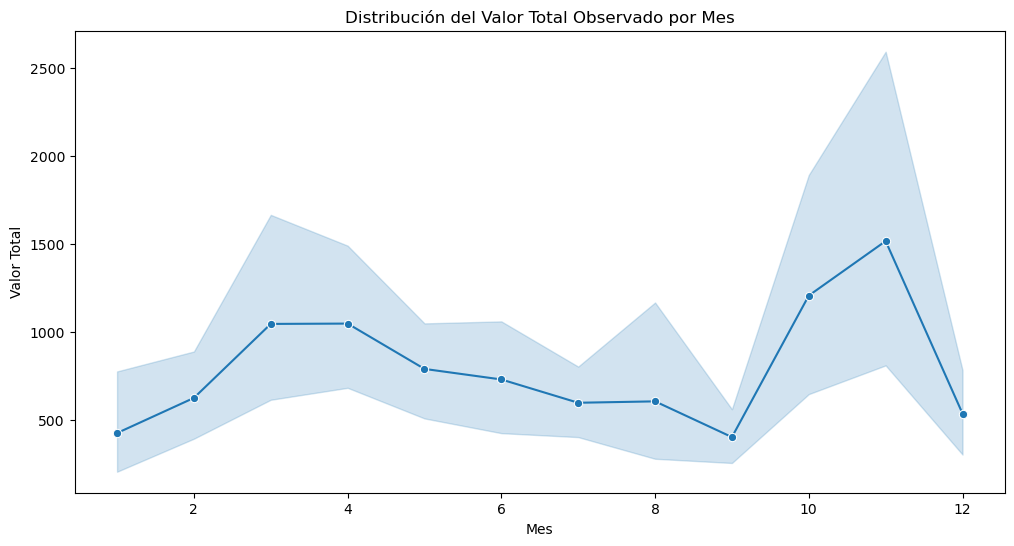

In [92]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Total', data=df_grouped, marker='o')
plt.title('Distribución del Valor Total Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Total')
plt.show()

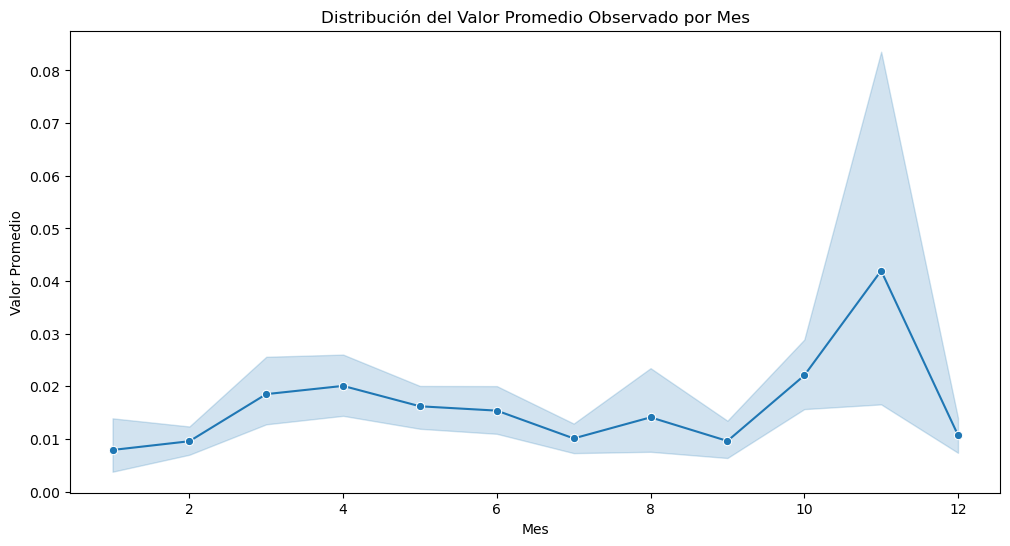

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Promedio', data=df_grouped, marker='o')
plt.title('Distribución del Valor Promedio Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio')
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_4468\1935551366.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




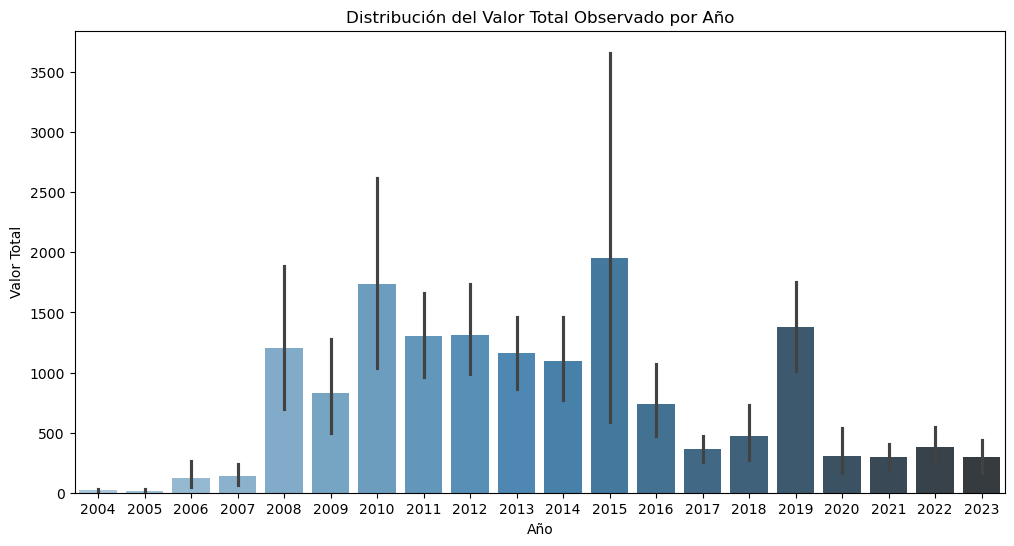

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Total', data=df_grouped, palette='Blues_d')
plt.title('Distribución del Valor Total Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total')
plt.show()

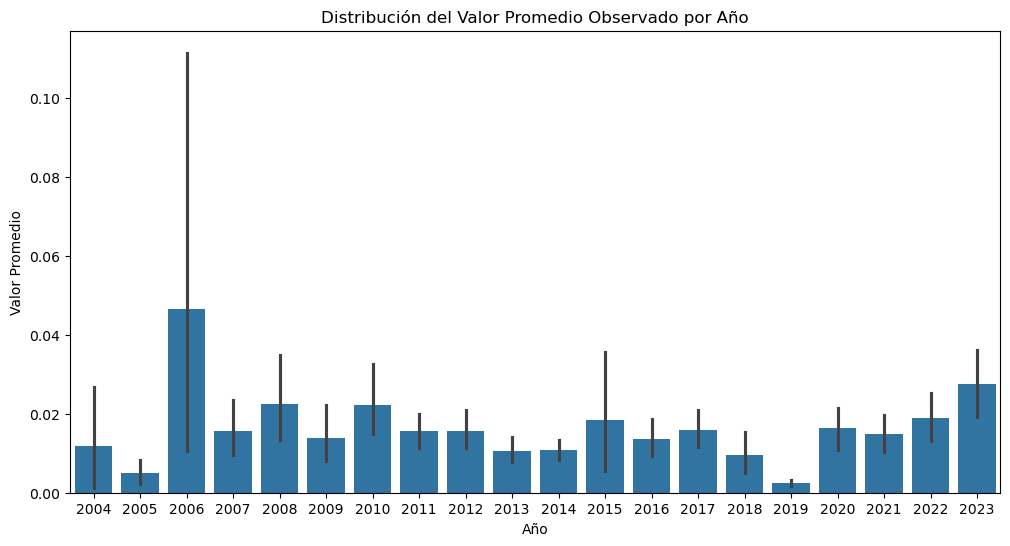

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Promedio', data=df_grouped)
plt.title('Distribución del Valor Promedio Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.show()

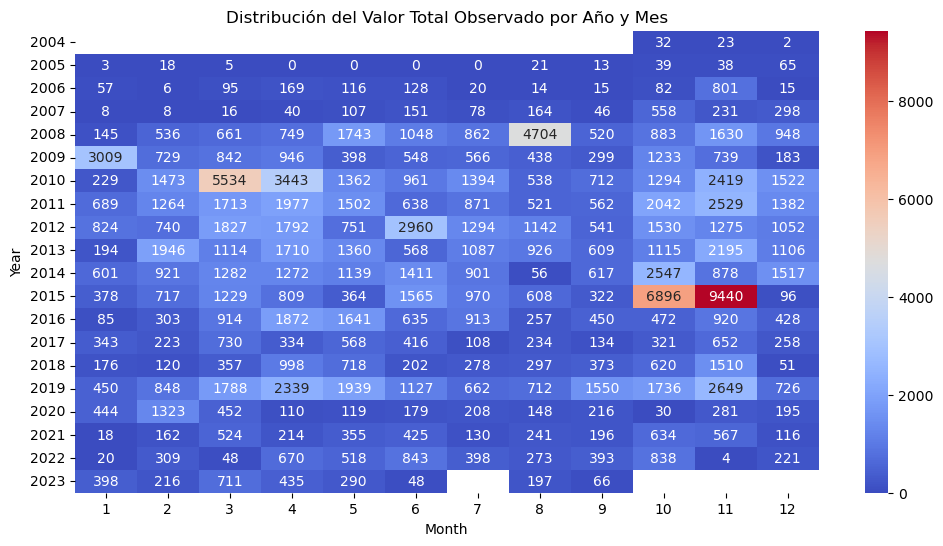

In [96]:
df_pivot = df_grouped.pivot(index='Year', columns='Month', values='Valor Total')

# Heatmap para visualizar el valor total observado por año y mes
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='coolwarm',annot=True,fmt='.0f')
plt.title('Distribución del Valor Total Observado por Año y Mes')
plt.show()

In [97]:
df_grouped = df_bogota.groupby(['Year', 'Month','Latitud','Longitud'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month','Latitud','Longitud', 'Valor Total', 'Valor Promedio']

df_grouped

C:\Users\danie\AppData\Local\Temp\ipykernel_4468\1044252746.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Year,Month,Latitud,Longitud,Valor Total,Valor Promedio
0,2004,1,4.343,-74.017,0.0,NaN
1,2004,1,4.343,-74.019,0.0,NaN
2,2004,1,4.343,-74.022,0.0,NaN
3,2004,1,4.343,-74.031,0.0,NaN
4,2004,1,4.343,-74.05,0.0,NaN
...,...,...,...,...,...,...
293995,2023,12,4.138,-74.184,0.0,NaN
293996,2023,12,4.138,-74.205,0.0,NaN
293997,2023,12,4.138,-74.233,0.0,NaN
293998,2023,12,4.138,-74.317,0.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\danie\Documents\Anaconda\envs\EnvBootcamp\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

c:\Users\danie\Documents\Anaconda\envs\EnvBootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



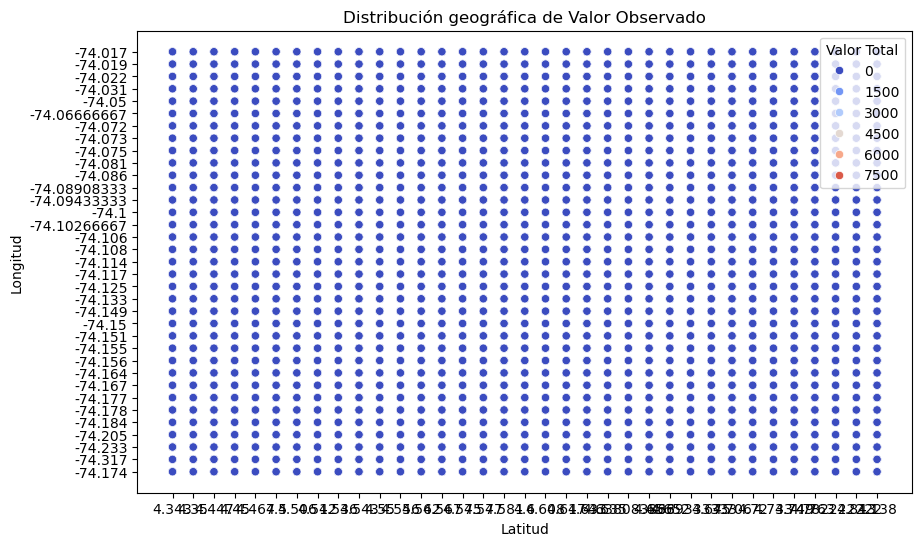

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitud', y='Longitud', hue='Valor Total', data=df_grouped, palette='coolwarm')
plt.title('Distribución geográfica de Valor Observado')
plt.show

## 23 últimos archivos de precipitación

Lista de archivos:

In [51]:
namesFiles = os.listdir(path+r'\CleanDatasets')[23:-1]
print(namesFiles)

['rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_santander.parquet', 'rain_sucre.parquet', 'rain_tolima.parquet', 'rain_valle_del_cauca.parquet', 'rain_vaupes.parquet', 'rain_vaupes1.parquet']


### Dimensionalidad de los dataset

Estamos interesados en encontrar los valores nulos dentro de los diferentes archivos, en la siguiente celda se calcula un DataFrame que detalla la siguiente información:

- File: Nombre del archivo
- Rows: Cantidad de filas del archivo
- Columns: Cantidad de columnas del archivo
- Size: Tamaño del dataframe, cantidad de celdas
- Nulls: Cantidad de valores nulos

Se observa que ningún archivo contiene valores nulos, además todos tienen la misma cantidad de columnas por tanto es posible formar un solo dataframe

In [52]:
dim = pd.DataFrame(columns=['File','Rows','Columns','Size','Nulls'])

for i in namesFiles:
    path_file = path + '\\CleanDatasets\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    row = pd.DataFrame({'File':[i],'Rows':[df_dept2.shape[0]],'Columns':[df_dept2.shape[1]],'Size':[df_dept2.size],'Nulls':[df_dept2.size-df_dept2.count().sum()]})
    dim = pd.concat([dim,row], ignore_index=True)

dim

,File,Rows,Columns,Size,Nulls
0,rain_guajira.parquet,4448321,10,44483210,0
1,rain_guaviare.parquet,29100,10,291000,0
2,rain_huila.parquet,10676628,10,106766280,0
3,rain_magdalena.parquet,5150365,10,51503650,0
4,rain_meta.parquet,2470476,10,24704760,0
5,rain_narino.parquet,469965,10,4699650,0
6,rain_narino1.parquet,5432162,10,54321620,0
7,rain_nill.parquet,334763,10,3347630,0
8,rain_norte_de_santander.parquet,8764156,10,87641560,0
9,rain_putumayo.parquet,854162,10,8541620,0


### Tipos de datos

Estamos interesados en recopilar la información de los diferentes archivos parquet para formar un solo dataframe sobre el cual se pudieran calcular algunas estadísticas exploratorias.

In [53]:
df_part2 = pd.DataFrame()
for i in namesFiles:
    path_file = path + '\\CleanDatasets\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    df_part2 = pd.concat([df_part2,df_dept2], ignore_index=True)
    del df_dept2

df_part2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0015067020,0240,2018-10-24 10:50:00,0.0,EL CERCADO,LA GUAJIRA,FONSECA,CARIBE - GUAJIRA,10.908,-73.008
1,0015075501,0240,2014-10-05 03:32:00,0.0,AEROPUERTO PUERTO BOLIVAR - AUT,LA GUAJIRA,URIBIA,CARIBE - GUAJIRA,12.22430556,-71.98288889
2,0015085050,0240,2014-04-04 04:40:00,0.0,TOROMANA - AUT,LA GUAJIRA,URIBIA,CARIBE - GUAJIRA,12.08352778,-71.21094444
3,0015067210,0240,2012-08-07 09:30:00,0.0,CARACOLI - En Siniestro,LA GUAJIRA,SAN JUAN DEL CESAR,CARIBE - GUAJIRA,10.95,-73.051
4,0015067220,0240,2016-05-19 08:00:00,0.0,PTE CARRETERA,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.511,-72.856
...,...,...,...,...,...,...,...,...,...,...
83599641,0042077020,0240,2021-07-24 01:40:00,0.0,MITU,VAUPÉS,MITÚ,VAUPES,1.26,-70.239
83599642,0042077020,0240,2021-07-24 01:30:00,0.0,MITU,VAUPÉS,MITÚ,VAUPES,1.26,-70.239
83599643,0042077020,0240,2021-07-24 03:30:00,0.0,MITU,VAUPÉS,MITÚ,VAUPES,1.26,-70.239
83599644,0042077020,0240,2021-07-24 11:10:00,0.0,MITU,VAUPÉS,MITÚ,VAUPES,1.26,-70.239


In [54]:
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83599646 entries, 0 to 83599645
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    object        
 1   CodigoSensor      object        
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    object        
 5   Departamento      object        
 6   Municipio         object        
 7   ZonaHidrografica  object        
 8   Latitud           object        
 9   Longitud          object        
dtypes: datetime64[ns](1), float32(1), object(8)
memory usage: 5.9+ GB


Teniendo en cuenta que el DataFrame ocupa un gran espacio en memoria, cambiamos el tipo de dato de algunas columnas. 

In [55]:
df_part2 = df_part2.astype({'CodigoEstacion':'category','CodigoSensor':'category','NombreEstacion':'category','Departamento':'category','Municipio':'category','ZonaHidrografica':'category','Latitud':'float64','Longitud':'float64'})
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83599646 entries, 0 to 83599645
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    category      
 1   CodigoSensor      category      
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    category      
 5   Departamento      category      
 6   Municipio         category      
 7   ZonaHidrografica  category      
 8   Latitud           float64       
 9   Longitud          float64       
dtypes: category(6), datetime64[ns](1), float32(1), float64(2)
memory usage: 2.9 GB


En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [56]:
df_part2.nunique()

CodigoEstacion          380
CodigoSensor              2
FechaObservacion    1599840
ValorObservado         6537
NombreEstacion          505
Departamento             22
Municipio               224
ZonaHidrografica         25
Latitud                 508
Longitud                457
dtype: int64

Note que existen 380 códigos de estación pero existen 505 nombres de estación, 508 latitudes y 457 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

#### Limpieza de datos correspondiente al nombre y coordenadas de las estaciones

Se observa que al filtrar por CodigoEstacion, NombreEstacion, Latitud y Longitud se encuentran 590 filas lo cual contrasta con los 380 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° son equivalente aproximadamente a 100m. 

In [57]:
df_part2[['Latitud','Longitud']] = df_part2[['Latitud','Longitud']].round(3)

Realizamos un conteo de la cantidad de registros para cada coordenada:

In [58]:
stations = df_part2.groupby(['CodigoEstacion','Latitud','Longitud'], observed=True).agg({'Latitud':'count'})
stations.columns = ['Count']
stations.reset_index(inplace=True)
stations

,CodigoEstacion,Latitud,Longitud,Count
0,0013095010,9.383,-75.667,478027
1,0015015050,11.115,-74.231,132284
2,0015015050,11.128,-74.229,8746
3,0015015060,11.111,-74.055,161403
4,0015015100,11.310,-73.933,87669
...,...,...,...,...
398,5205500123,1.055,-77.270,89993
399,5311500056,3.848,-76.987,129900
400,5311500121,3.645,-76.565,152362
401,5311500149,3.884,-77.049,8271


Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [59]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada CodigoEstacion el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [60]:
stationMean = stations.groupby(['CodigoEstacion'], observed=True).agg({'Latitud':'mean','Longitud':'mean'}).round(3)
stationMean = stationMean.reset_index()

stationMean.columns = ['CodigoEstacion','LatitudMean','LongitudMean']
stations = stations.merge(stationMean, how='inner', on='CodigoEstacion')
stations['Distance'] = stations.apply(lambda x: Distance(x['Latitud'],x['Longitud'],x['LatitudMean'],x['LongitudMean']), axis=1)
stations

,CodigoEstacion,Latitud,Longitud,Count,LatitudMean,LongitudMean,Distance
0,0013095010,9.383,-75.667,478027,9.383,-75.667,0.000
1,0015015050,11.115,-74.231,132284,11.122,-74.230,0.786
2,0015015050,11.128,-74.229,8746,11.122,-74.230,0.676
3,0015015060,11.111,-74.055,161403,11.111,-74.055,0.000
4,0015015100,11.310,-73.933,87669,11.310,-73.932,0.109
...,...,...,...,...,...,...,...
398,5205500123,1.055,-77.270,89993,1.055,-77.270,0.000
399,5311500056,3.848,-76.987,129900,3.848,-76.987,0.000
400,5311500121,3.645,-76.565,152362,3.645,-76.565,0.000
401,5311500149,3.884,-77.049,8271,3.884,-77.049,0.000


Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas:

In [61]:
stations.loc[stations['Distance']<1.5, 'Latitud'] = stations['LatitudMean']
stations.loc[stations['Distance']<1.5, 'Longitud'] = stations['LongitudMean']
stations

,CodigoEstacion,Latitud,Longitud,Count,LatitudMean,LongitudMean,Distance
0,0013095010,9.383,-75.667,478027,9.383,-75.667,0.000
1,0015015050,11.122,-74.230,132284,11.122,-74.230,0.786
2,0015015050,11.122,-74.230,8746,11.122,-74.230,0.676
3,0015015060,11.111,-74.055,161403,11.111,-74.055,0.000
4,0015015100,11.310,-73.932,87669,11.310,-73.932,0.109
...,...,...,...,...,...,...,...
398,5205500123,1.055,-77.270,89993,1.055,-77.270,0.000
399,5311500056,3.848,-76.987,129900,3.848,-76.987,0.000
400,5311500121,3.645,-76.565,152362,3.645,-76.565,0.000
401,5311500149,3.884,-77.049,8271,3.884,-77.049,0.000


En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodigoEstacion* el cálculo de *TotalCount* y *%Count*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodigoEstacion*. Se observa en la siguiente celda que para algunos *CodigoEstacion* aparecen unos pocos registros con coordenadas ampliamente diferentes a la mayoria de registros.

In [63]:
sta1 = stations[stations['Distance']>1.5].merge(df_part2[['CodigoEstacion','Latitud','Longitud','NombreEstacion']], how='left', on=['CodigoEstacion','Latitud','Longitud']).drop_duplicates().reset_index(drop=True)
sta2 = sta1.groupby(['CodigoEstacion'], observed=True)['Count'].agg('sum').rename('TotalCount')
sta1 = sta1.merge(sta2, how='inner', on='CodigoEstacion')
sta1['%Count'] = sta1['Count']/sta1['TotalCount']
sta1

,CodigoEstacion,Latitud,Longitud,Count,LatitudMean,LongitudMean,Distance,NombreEstacion,TotalCount,%Count
0,0017015010,12.542,-81.731,353202,12.565,-81.716,3.032,APTO SESQUICENTENARIO TX GPRS,680862,0.518757
1,0017015010,12.588,-81.701,327660,12.565,-81.716,3.032,AEROPUERTO SESQUICENTENARIO,680862,0.481243
2,2319500125,7.650,-73.178,122441,7.694,-73.114,8.584,POLIDEPORTIVO CACHIRA - AUT,123466,0.991698
3,2319500125,7.737,-73.049,1025,7.694,-73.114,8.612,POLIDEPORTIVO CACHIRA,123466,0.008302
4,2633500119,3.560,-76.457,848,3.722,-76.330,22.872,GUACHAL PALMASECA,98024,0.008651
5,2633500119,3.883,-76.202,97176,3.722,-76.330,22.851,GUACHAL PALMASECA - AUT,98024,0.991349
6,2633700150,3.895,-76.347,120951,4.150,-76.224,31.466,GUAYABAL - AUT,121974,0.991613
7,2633700150,4.405,-76.101,1023,4.150,-76.224,31.464,GUAYABAL,121974,0.008387
8,3206500045,3.444,-73.744,997,3.480,-73.742,4.009,GRANADA SENA,107544,0.009271
9,3206500045,3.516,-73.740,106547,3.480,-73.742,4.009,GRANADA SENA - AUT,107544,0.990729


Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Count*, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas mas frecuentes.

In [64]:
sta2 = sta1.set_index('CodigoEstacion')
sta2['Latitud'] = sta2.loc[sta2['%Count']>0.8, 'Latitud']
sta2['Longitud'] = sta2.loc[sta2['%Count']>0.8, 'Longitud']
sta2 = sta2.reset_index().dropna()
sta2 = sta2[sta2.columns[:3]].drop_duplicates()
sta2

,CodigoEstacion,Latitud,Longitud
2,2319500125,7.650,-73.178
4,2633500119,3.883,-76.202
6,2633700150,3.895,-76.347
8,3206500045,3.516,-73.740


Las correcciones son aplicadas al dataframe *stations1*, el cual almacenará parcialmente las modificaciones realizadas. Se observa que ahora se cuenta con un dataframe de estaciones con 381 registros, de manera que permanece un registro duplicado.

In [65]:
stations1 = stations[['CodigoEstacion','Latitud','Longitud']].copy()
stations2 = stations1.merge(sta2, how='left', on='CodigoEstacion', suffixes=('', '_adj'))
stations1.loc[stations2['Latitud_adj'].notna(), 'Latitud'] = stations2['Latitud_adj']
stations1.loc[stations2['Longitud_adj'].notna(), 'Longitud'] = stations2['Longitud_adj']
stations1 = stations1.drop_duplicates().reset_index(drop=True)
stations1

,CodigoEstacion,Latitud,Longitud
0,0013095010,9.383,-75.667
1,0015015050,11.122,-74.230
2,0015015060,11.111,-74.055
3,0015015100,11.310,-73.932
4,0015015120,11.223,-74.186
...,...,...,...
376,5205500123,1.055,-77.270
377,5311500056,3.848,-76.987
378,5311500121,3.645,-76.565
379,5311500149,3.884,-77.049


Identificamos el registro con incoherencias en sus coordenadas. En este caso realizamos una busqueda manual en GoogleMaps con el fin de encontrar la coordenada correcta del lugar, la cual corresponde a: (12.588,	-81.701)

In [66]:
sta3 = stations1[stations1['CodigoEstacion'].duplicated(keep=False)].reset_index(drop=True)
sta3

,CodigoEstacion,Latitud,Longitud
0,0017015010,12.542,-81.731
1,0017015010,12.588,-81.701


Finalmente, realizamos el cambio del registro duplicado y obtenemos un dataframe parcial que nos permitirá recopilar los valores corregidos de las coordenadas.

In [67]:
stations3 = stations1.merge(sta3[sta3.index==1], how='left', on='CodigoEstacion', suffixes=('', '_adj'))
stations3.loc[stations3['Latitud_adj'].notna(), 'Latitud'] = stations3['Latitud_adj']
stations3.loc[stations3['Longitud_adj'].notna(), 'Longitud'] = stations3['Longitud_adj']
stations3 = stations3[['CodigoEstacion','Latitud','Longitud']].drop_duplicates().reset_index(drop=True)
stations3

,CodigoEstacion,Latitud,Longitud
0,0013095010,9.383,-75.667
1,0015015050,11.122,-74.230
2,0015015060,11.111,-74.055
3,0015015100,11.310,-73.932
4,0015015120,11.223,-74.186
...,...,...,...
375,5205500123,1.055,-77.270
376,5311500056,3.848,-76.987
377,5311500121,3.645,-76.565
378,5311500149,3.884,-77.049
